# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


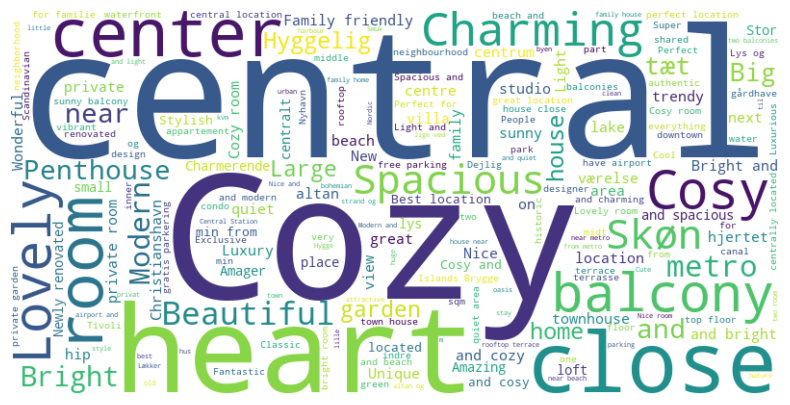

In [28]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import folium as fo
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

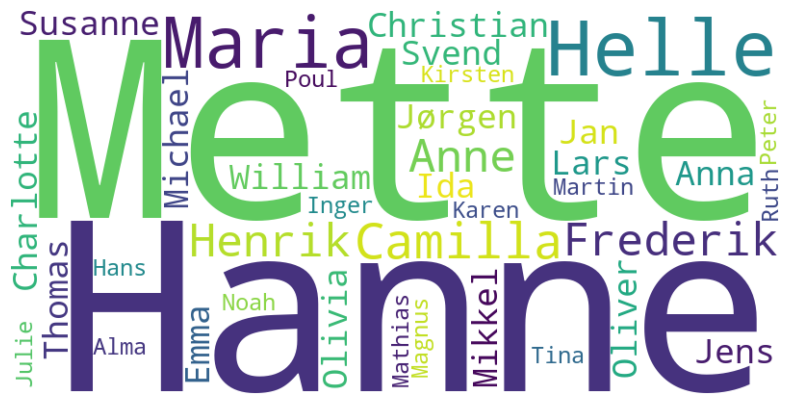

In [29]:
# Convert the 'name' column to a single string
# load the data
names_data = pd.read_csv('danish-names.csv')
names_filtred=names_data[["male_name","female_name"]]
names_filtred = names_filtred.dropna()
names_filtred["male_name"] = names_filtred["male_name"].replace("J�rgen", "Jørgen")
combined_names = pd.concat([names_filtred["male_name"], names_filtred["female_name"]], ignore_index=True).dropna()
true_names = combined_names.to_list()
host_names = data_filtered["host_name"].to_list()

names : set[str] = set()
for host_name in host_names:
    if host_name in true_names:
        names.add(str(host_name))

text = ' '.join(names)

wordcloud1 = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)
# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [30]:
center_lat = data_filtered['latitude'].mean()
center_lon = data_filtered['longitude'].mean()

my_map = fo.Map(location=[center_lat,center_lon], zoom_start=12)

for _, row in data_filtered.iterrows():
    fo.Marker([row['latitude'], row['longitude']],popup="example").add_to(my_map)

#uncomment when you want to see the map, it takes a lot to load -_-
# my_map

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

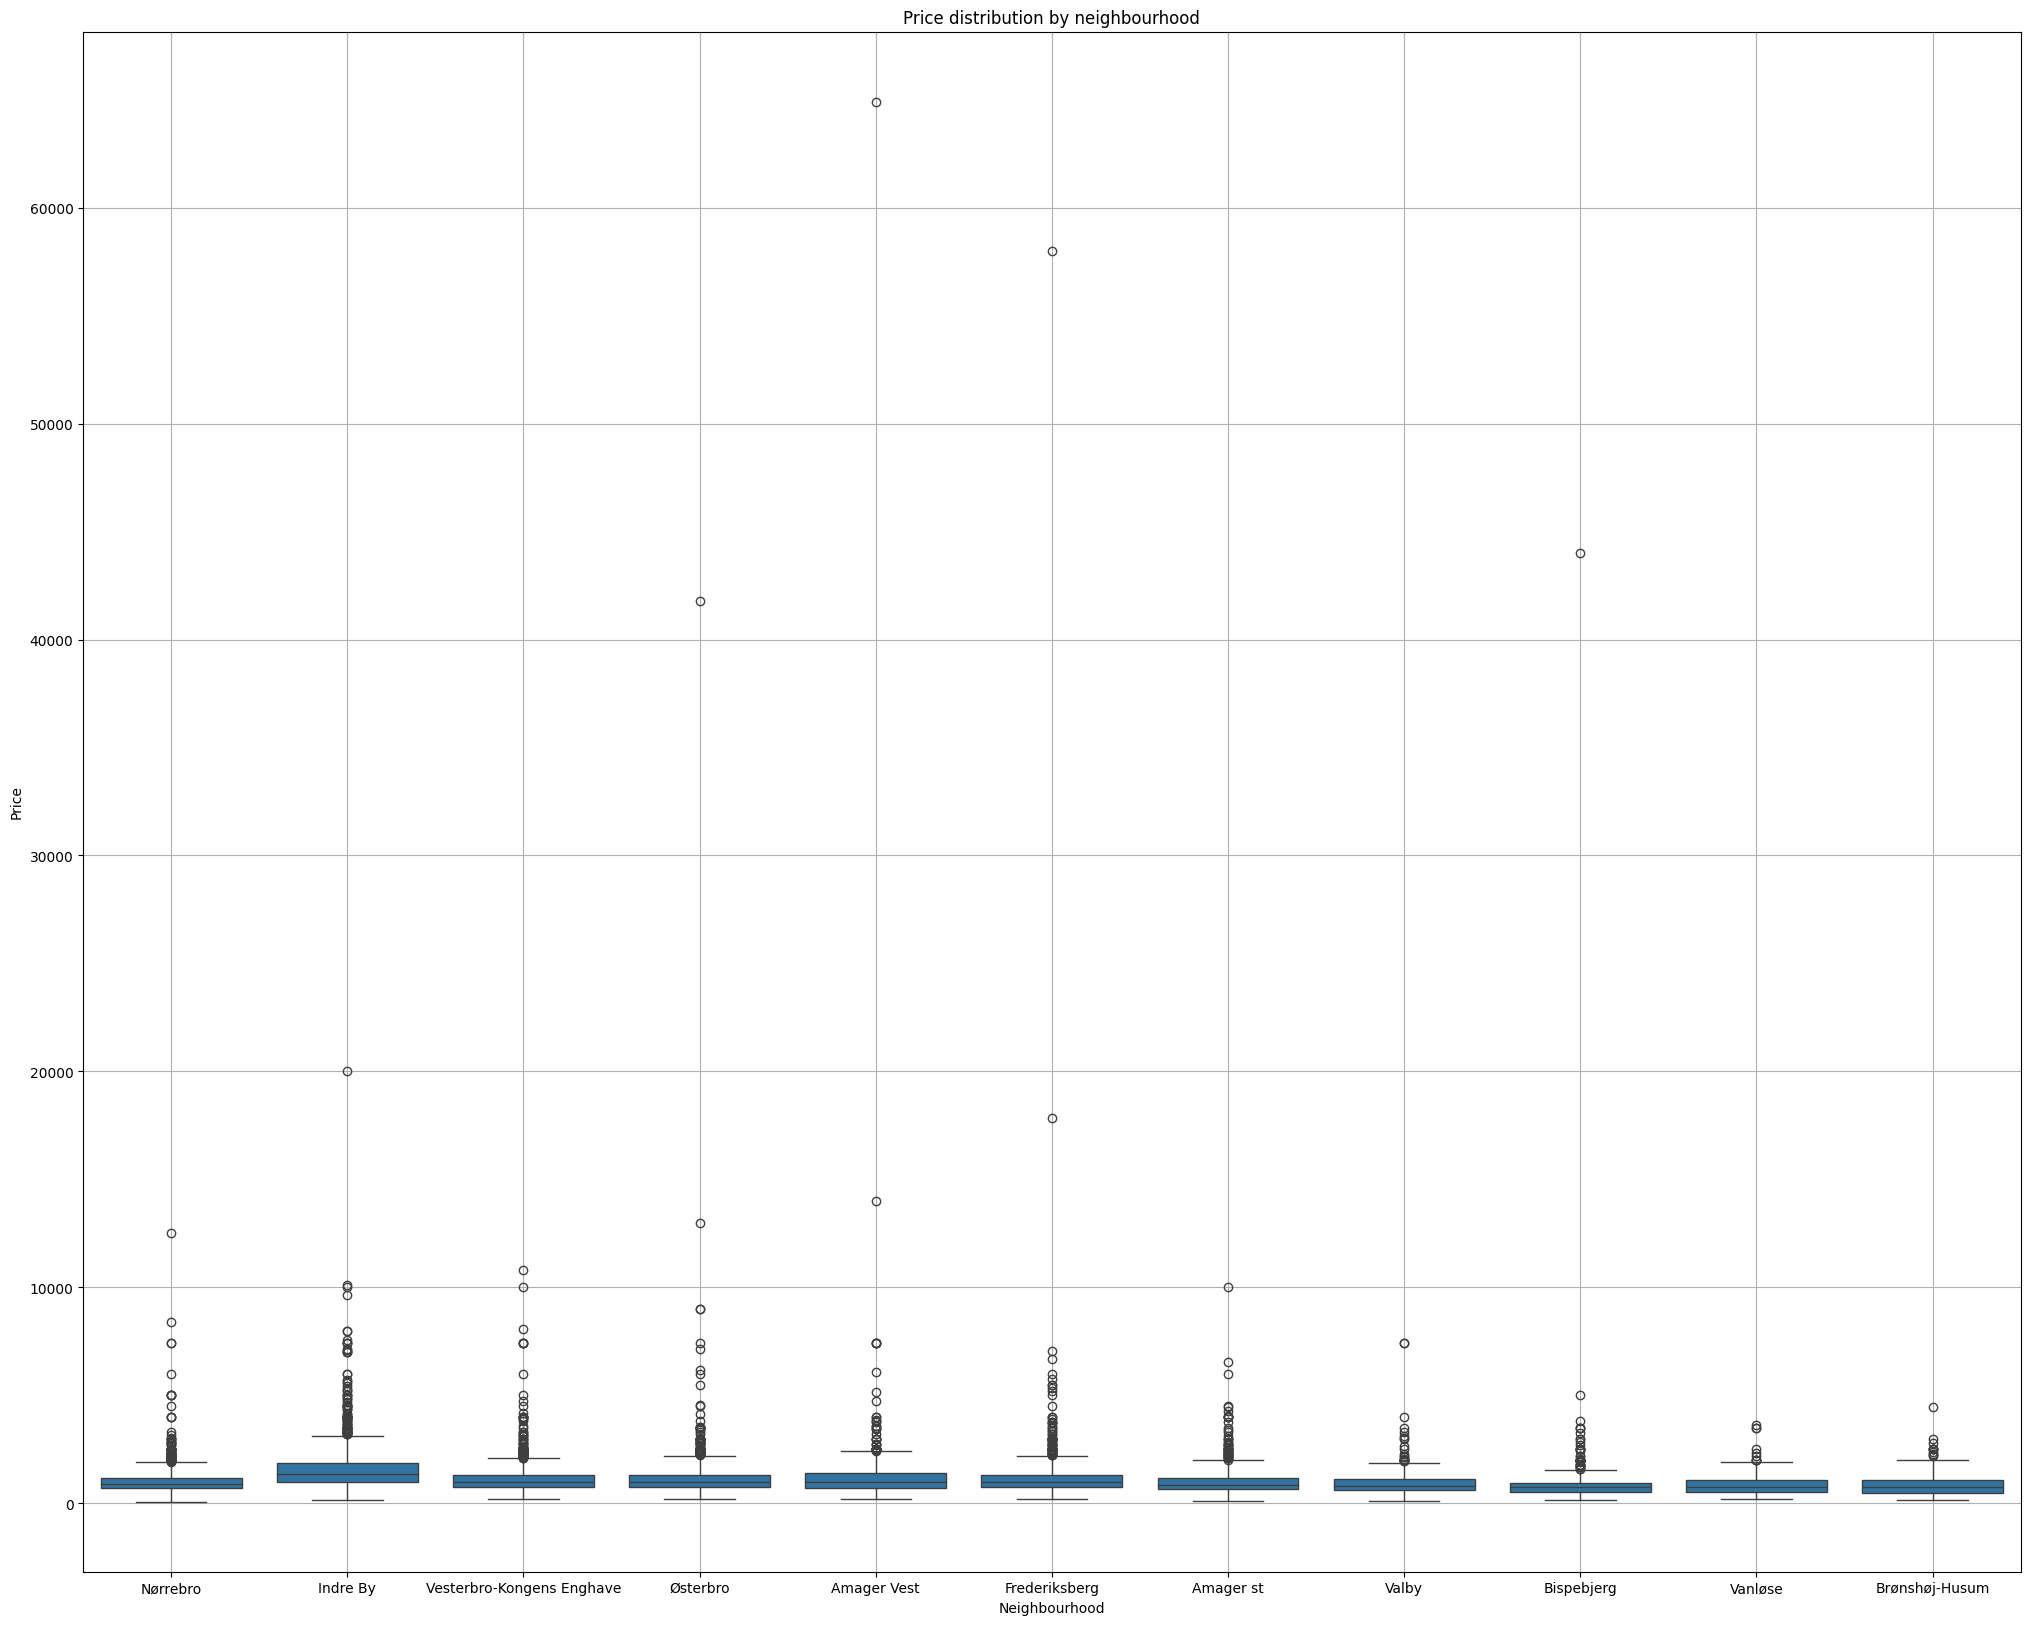

In [31]:
plt.figure(figsize=(25,20))
sns.boxplot(x="neighbourhood_cleansed", y="price", data=data_filtered)
plt.title("Price distribution by neighbourhood")
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.grid(True)
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

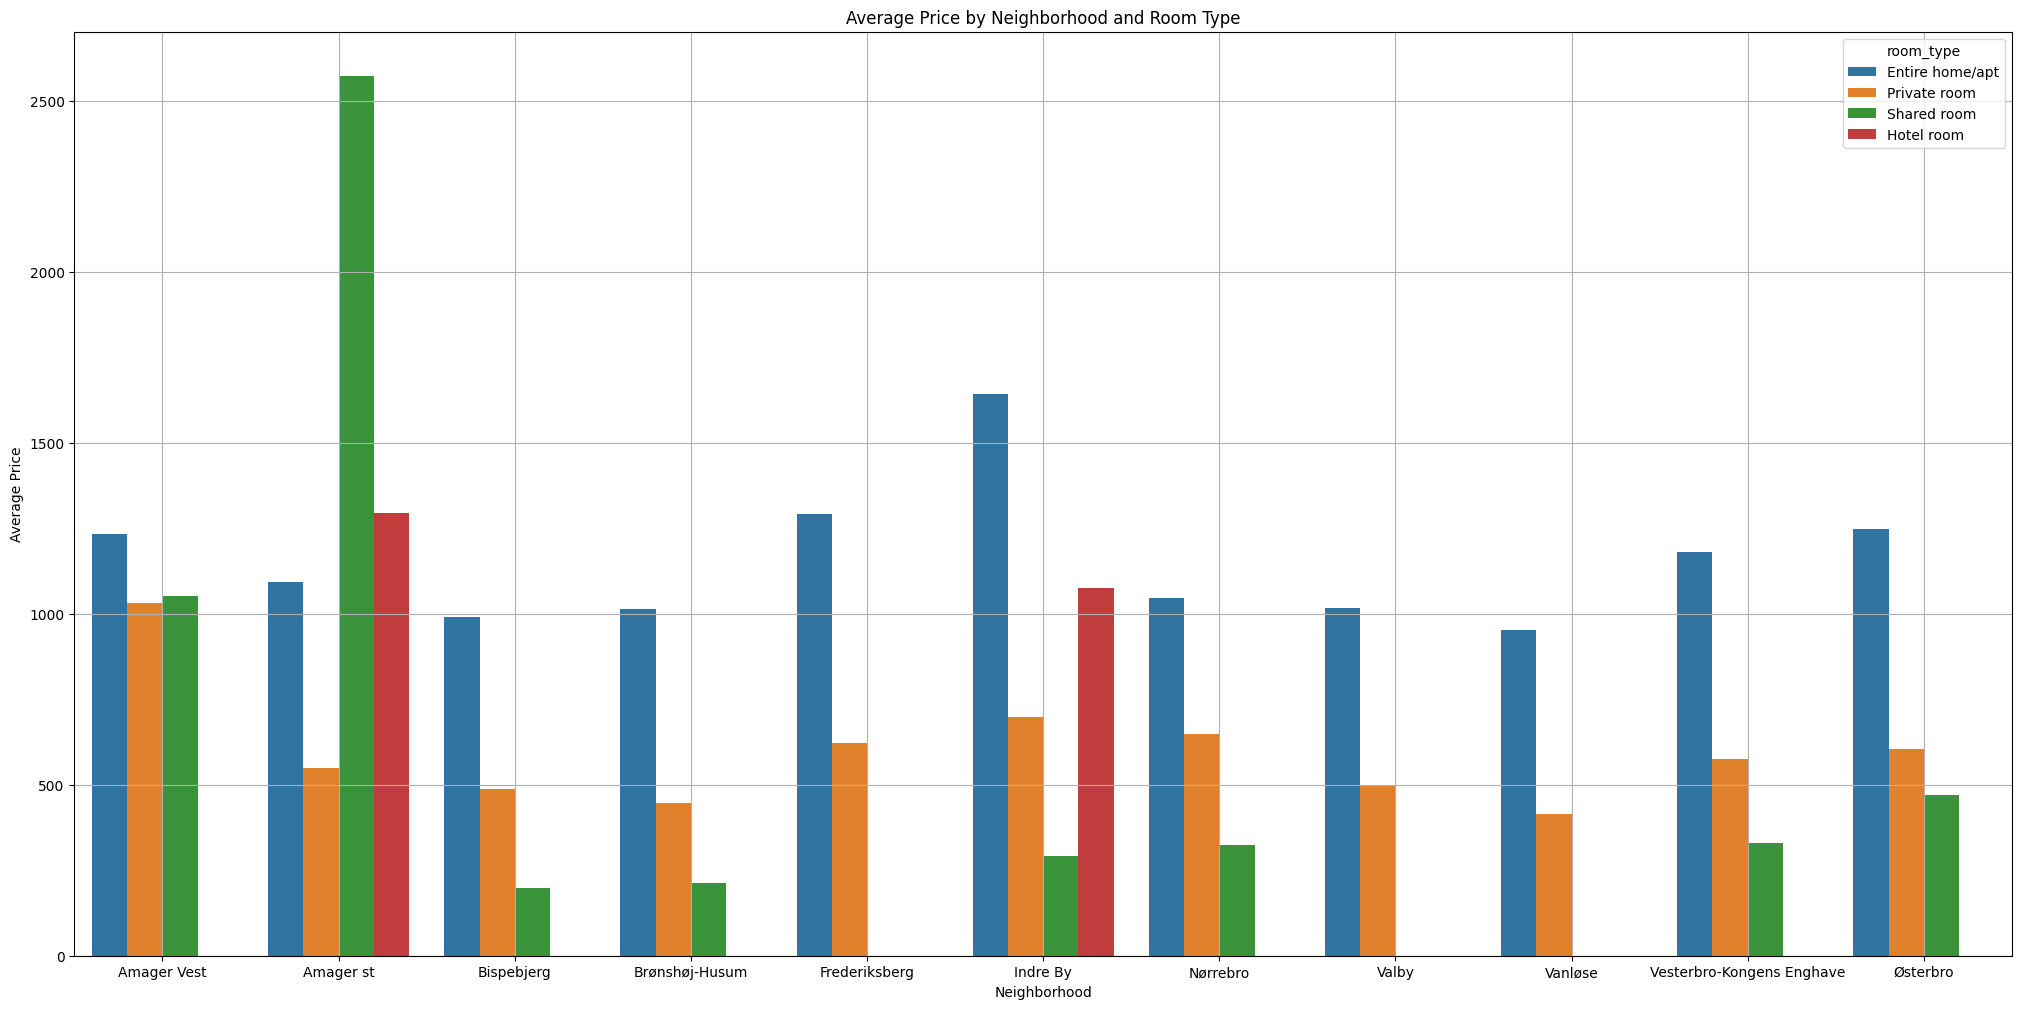

In [32]:
# Descriptive statistics for Price by Neighbourhood and Room Type
descriptive_stats = data_filtered.groupby(['neighbourhood_cleansed', 'room_type']).agg({
    'price': ['mean', 'median', 'std', 'var', 'min', 'max', 'count'],
    'availability_365': ['mean', 'median', 'std', 'var', 'min', 'max', 'count']
}).reset_index()

# Renaming columns for better readability
descriptive_stats.columns = ['neighbourhood_cleansed', 'room_type', 'price_mean', 'price_median', 'price_std', 'price_variance', 'price_min', 'price_max', 'price_count',
                             'availability_mean', 'availability_median', 'availability_std', 'availability_variance', 'availability_min', 'availability_max', 'availability_count']
quartiles_price = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['price'].quantile([0.25, 0.5, 0.75]).unstack().rename(columns={0.25: 'price_q1', 0.5: 'price_q2', 0.75: 'price_q3'})
quartiles_availability = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['availability_365'].quantile([0.25, 0.5, 0.75]).unstack().rename(columns={0.25: 'availability_q1', 0.5: 'availability_q2', 0.75: 'availability_q3'})

# Merging the quartiles with the descriptive statistics
descriptive_stats = pd.merge(descriptive_stats, quartiles_price, on=['neighbourhood_cleansed', 'room_type'])
descriptive_stats = pd.merge(descriptive_stats, quartiles_availability, on=['neighbourhood_cleansed', 'room_type'])

# Display the final descriptive statistics
plt.figure(figsize=(25, 12))
sns.barplot(x='neighbourhood_cleansed', y='price_mean', hue='room_type', data=descriptive_stats)
plt.title('Average Price by Neighborhood and Room Type')
plt.ylabel('Average Price')
plt.xlabel('Neighborhood')
plt.grid(True)
plt.show()

### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

In [33]:
# first split the data into features and target variable
X = data_filtered[['neighbourhood_cleansed', 'room_type', 'availability_365']]  # Features
y = data_filtered['price']  # Target variable (price)

# Step 2: Apply OneHotEncoder to categorical variables
# We'll use ColumnTransformer to apply OneHotEncoder only to categorical columns

# Define which columns to encode
categorical_features = ['neighbourhood_cleansed', 'room_type', 'availability_365']

# Define the transformer: it will apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
)

# Step 3: Transform the data
X_transformed = preprocessor.fit_transform(X)

# split the data into training and testing sets (we use the same random state to keep the same X->y relation)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=7)
X_OLS_train, X_OLS_test = train_test_split(X_transformed, test_size=0.2, random_state=7)

# fit the OLS model
ols_model = LinearRegression()
ols_model.fit(X_OLS_train, y_train)

# fit the ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# fit the lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# predict
ols_pred = ols_model.predict(X_OLS_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# evaluate using MSE
ols_mse = mean_squared_error(y_test, ols_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
r_squared = r2_score(y_true=y_test, y_pred=ols_pred)

print("OLS Mean Squared Error:", ols_mse)
print("Ridge Mean Squared Error:", ridge_mse)
print("Lasso Mean Squared Error:", lasso_mse)
print("R squared for OLS_pred: ", r_squared)

OLS Mean Squared Error: 1189730.636272227
Ridge Mean Squared Error: 1186988.8205542497
Lasso Mean Squared Error: 1185263.0794470701
R squared for OLS_pred:  0.07947752654524654
